<br>

<br>

<br>

# 🚀 **PREDICTING DIABETES** 🚀

**BOOSTING ALGORITHM (XGBOOST)**

<br>

## **INDEX**

- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**

<br>

### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

**1.1. PROBLEM DEFINITION**

Diabetes is a chronic health condition that affects millions of people worldwide. Early detection and diagnosis of diabetes are crucial for effective management and prevention of complications. In this study, we aim to develop a predictive model that can accurately identify individuals at risk of developing diabetes based on a set of diagnostic measures. By leveraging a dataset from the National Institute of Diabetes and Digestive and Kidney Diseases.

**RESEARCH QUESTIONS**

**Feature Importance**
- Which diagnostic measures (e.g., glucose levels, BMI) are the strongest predictors of diabetes?
- How do the relative importance of these features compare?

**Feature Interactions**
- Are there significant interactions between diagnostic measures that influence diabetes risk?
- How do these interactions affect the predictive model?

**Clinical Implications**
- Can the model identify subgroups of patients with distinct risk profiles?
- How can the model be used to improve clinical decision-making and early intervention?

**Model Performance**
- How well does the **`BOOSTING ALGORITHM (XGBoost)`** generalize to new, unseen data?
- What is the impact of different hyperparameter settings on model performance?


**Methodology**
- **`Extreme Gradient Boosting`**
- XGBoost, or Extreme Gradient Boosting, is a powerful machine learning algorithm that is widely used for both classification and regression tasks. It's part of a family of algorithms known as gradient boosting machines.

**How does XGBoost work?**

- **Sequential Model Building**:  XGBoost constructs a model sequentially. It starts by building a simple model (like a decision tree) and then adds new models one by one.
- **Minimizing Loss**: Each new model is trained to correct the errors made by the previous models. It does this by minimizing a loss function, which measures how well the model fits the training data.
- **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting. This helps the model generalize better to unseen data.
- **Parallel Processing**: XGBoost is designed to be highly efficient and can leverage multiple cores of a CPU or GPUs for parallel processing.


**`XGBoost` vs. `Random Forest` vs. `Decision Tree`**
- **Decision Tree**: A decision tree is a basic machine learning model that makes decisions by splitting the data based on certain conditions. It's a single tree-like model.
- **Random Forest**: A random forest is an ensemble method that combines multiple decision trees. Each tree in the forest is trained on a different subset of the data and features. The final prediction is made by averaging the predictions of all the trees.
- **XGBoost**: XGBoost is also an ensemble method, but it differs from random forest in several ways:
    - **Sequential vs. Parallel**: Random forest builds trees independently, while XGBoost builds trees sequentially.
    - **Optimization**: XGBoost optimizes a loss function directly, making it more efficient.
    - **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting.
    - **Handling Missing Values**: XGBoost has built-in mechanisms for handling missing values.

**To summarize:**
- Decision trees are the building blocks of more complex models like random forests and XGBoost.
- Random forests combine multiple decision trees to improve accuracy and reduce overfitting.
- XGBoost is a highly optimized gradient boosting algorithm that builds models sequentially and incorporates regularization to prevent overfitting.

<br>

**1.2. LIBRARY IMPORTING**

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle  # For saving the model
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**1.3. DATA COLLECTION**

**Objective**
The goal of this step is to collect and load the preprocessed training and testing datasets. These datasets have been scaled and cleaned to ensure consistency in model training and evaluation.

In [37]:
# URLs for the processed datasets (adjust these URLs with the correct RAW paths from GitHub)
X_train_url = "https://raw.githubusercontent.com/jenuzho/PREDICTING-DIABETES-decision-tree/main/data/processed/X_train_without_outliers_minmax_sel.csv"
X_test_url = "https://raw.githubusercontent.com/jenuzho/PREDICTING-DIABETES-decision-tree/main/data/processed/X_test_without_outliers_minmax_sel.csv"
y_train_url = "https://raw.githubusercontent.com/jenuzho/PREDICTING-DIABETES-decision-tree/main/data/processed/y_train.csv"
y_test_url = "https://raw.githubusercontent.com/jenuzho/PREDICTING-DIABETES-decision-tree/main/data/processed/y_test.csv"

# Load the datasets
X_train = pd.read_csv(X_train_url)
X_test = pd.read_csv(X_test_url)
y_train = pd.read_csv(y_train_url)
y_test = pd.read_csv(y_test_url)

# Check the first few rows of the training data
print(X_train.head())
print(y_train.head())


   Pregnancies   Glucose   Insulin       BMI  DiabetesPedigreeFunction  \
0     0.176471  0.577889  0.188172  0.641414                  0.064171   
1     0.176471  0.567839  0.114247  0.496633                  0.488414   
2     0.294118  0.793970  0.282258  0.663300                  0.282531   
3     0.176471  0.391960  0.000000  0.547138                  0.171123   
4     0.000000  0.507538  0.000000  0.601010                  0.106952   

        Age  
0  0.116667  
1  0.066667  
2  0.133333  
3  0.300000  
4  0.083333  
   Outcome
0        0
1        0
2        1
3        0
4        0


**Key Points:**
- **Dataset**: The training and testing datasets include diagnostic measures like **`Pregnancies`**, **`Glucose`**, and **`BMI`**, which are critical for predicting diabetes.
- **Features** (`X_train`).  **Target variable** (`y_train`):
- **Preprocessing**: The features are scaled (MinMaxScaler) and cleaned, ensuring no outliers disrupt the analysis.

<br>

<br>

### **STEP 2: TRAIN THE BASE MODEL**

**Objective**
The purpose of this step is to train a baseline predictive model using **XGBoost** with default parameters and evaluate its initial performance on the testing dataset. This serves as a benchmark for future model optimization.


In [38]:
# Create the base XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")

# Train the model on the training data
xgb_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Base Model Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Base Model Accuracy: 0.7727272727272727

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        96
           1       0.68      0.74      0.71        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.77      0.77       154



**Results**
- **Base Model Accuracy:** **0.77 (77%)**
- **Classification Report Highlights:**
  - **Precision (class 0):** **0.84**, indicating strong performance in identifying negative cases (non-diabetic).
  - **Precision (class 1):** **0.68**, showing the need for improvement in detecting positive cases (diabetic).
  - **Recall (class 0):** **0.79**, suggesting a good ability to correctly classify negative cases.
  - **Recall (class 1):** **0.74**, which is slightly better but still weaker for positive cases.
  - **F1-Score (class 0):** **0.81**, reflecting balanced performance for negative class.
  - **F1-Score (class 1):** **0.71**, highlighting a weaker predictive ability for the positive class.

**Key Points**
- The **baseline model** achieves an accuracy of **77%**, which will act as a benchmark for future optimization efforts.
- The model performs better for **class 0** (non-diabetic) compared to **class 1** (diabetic), indicating potential challenges with class imbalance or feature differentiation.
- The **weighted average** F1-Score is **0.77**, which reflects the overall performance of the model.

<br>

<br>

### **STEP 3: CROSS-VALIDATION AND FINAL MODEL TRAINING**

**Objective**
The goal of this step is to leverage **XGBoost's cross-validation (`xgb.cv`)** functionality to determine the optimal number of boosting rounds for the model. Using this information, we train the final model with the best configuration and evaluate its performance on the test dataset.

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert data to DMatrix (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters
param = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# Perform cross-validation
cv_results = xgb.cv(param, dtrain, num_boost_round=100, nfold=3, metrics='logloss', as_pandas=True)

# Train the final model with the best number of boosting rounds
final_model = xgb.train(param, dtrain, num_boost_round=len(cv_results))

# Make predictions
y_pred = final_model.predict(dtest)
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Final Model Accuracy: {accuracy}")


Final Model Accuracy: 0.7987012987012987


**Results**
- **Cross-Validation Outcome:**
  - Cross-validation helped determine the optimal number of boosting rounds.
- **Final Model Accuracy:** **0.79 (79%)**


**Key Points**
- The final model outperformed the base model with an accuracy improvement of **2%** (from **77%** to **79%**).
- The **logloss metric** was minimized during cross-validation, ensuring a more accurate model with fewer errors in probability estimation.
- Predictions were made by thresholding probabilities at **0.5**:
  - Values > **0.5** were classified as **1** (diabetic).
  - Values ≤ **0.5** were classified as **0** (non-diabetic).

<br>

<br>

### **STEP 4: EVALUATE THE OPTIMIZED MODEL**

**Objective**
The purpose of this step is to evaluate the performance of the optimized **XGBoost model** using various metrics, including accuracy, precision, recall, F1-score, and the confusion matrix. This evaluation highlights the strengths and weaknesses of the model after hyperparameter optimization.

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Clean the best parameters by removing the prefix if needed
best_params = {key.split('__')[-1]: value for key, value in grid_search.best_params_.items()}

# Train a new XGBClassifier with the cleaned parameters
best_xgb_model = XGBClassifier(**best_params, eval_metric="logloss", random_state=42)
best_xgb_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred_optimized = best_xgb_model.predict(X_test)

# Evaluate the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)
print("\nConfusion Matrix:")
print(conf_matrix)


Optimized Model Accuracy: 0.7077922077922078

Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        96
           1       1.00      0.22      0.37        58

    accuracy                           0.71       154
   macro avg       0.84      0.61      0.59       154
weighted avg       0.80      0.71      0.64       154


Confusion Matrix:
[[96  0]
 [45 13]]


**Results**
- **Optimized Model Accuracy:** **0.71 (71%)**
- **Classification Report Highlights:**
  - **Precision (class 0):** **0.68**, showing moderate ability to identify non-diabetic cases.
  - **Precision (class 1):** **1.00**, indicating perfect identification of diabetic cases in terms of predicted positives.
  - **Recall (class 0):** **1.00**, demonstrating excellent sensitivity for non-diabetic cases.
  - **Recall (class 1):** **0.22**, highlighting poor sensitivity for diabetic cases (many false negatives).
  - **F1-Score (class 0):** **0.81**, reflecting balanced performance for the non-diabetic class.
  - **F1-Score (class 1):** **0.37**, showing the need for improvement in classifying diabetic cases.

- **Confusion Matrix:**
[[96 0] [45 13]]

 **True Negatives (TN):** **96**
- **False Positives (FP):** **0**
- **False Negatives (FN):** **45**
- **True Positives (TP):** **13**

**Key Points**
- The model achieves an overall accuracy of **71%**, slightly lower than the baseline model's performance of **77%**.
- The **recall for class 1 (diabetic cases)** is low (**22%**), indicating a high number of false negatives. This could lead to underdiagnosis of diabetes.
- While the precision for class 1 is perfect (**100%**), the low recall significantly impacts the overall effectiveness of the model for predicting diabetic cases.


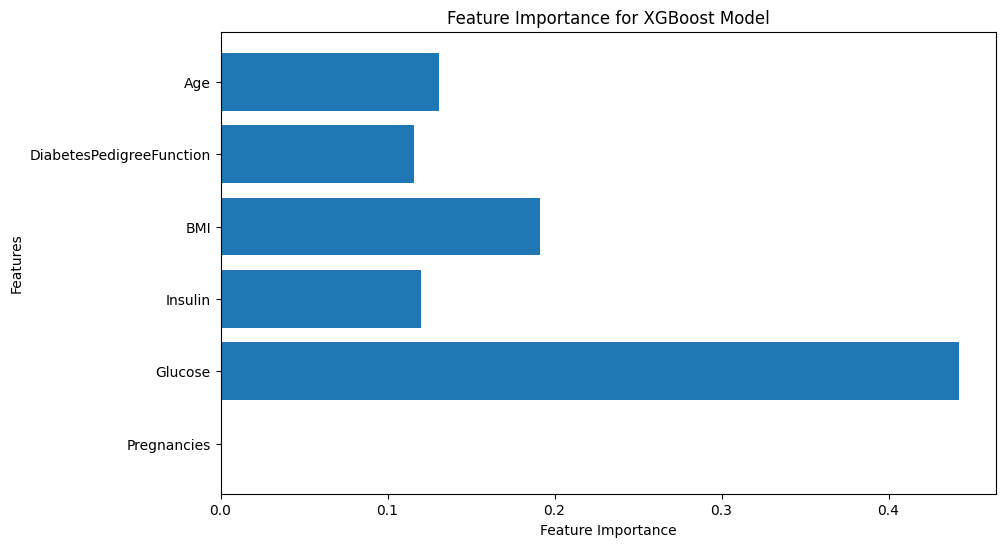

In [46]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, best_xgb_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for XGBoost Model")
plt.show()


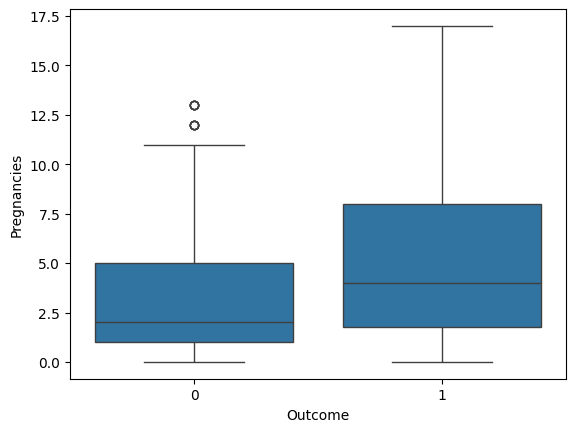

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.show()


In [50]:
import pickle

# Save the optimized model
with open("optimized_xgboost_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

print("Optimized model saved successfully.")


Optimized model saved successfully.


In [51]:
# Load the optimized model
with open("optimized_xgboost_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded Model Accuracy: {accuracy_loaded}")


Loaded Model Accuracy: 0.7077922077922078
